In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [1]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# pandas: Description
# numpy: Description
# matplotlib.pyplot: Description
# seaborn: Description
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we load the machine dataset which contains information about various machine parameters and whether a failure occurred.

In [2]:
# Load the machine dataset
# Load the dataset
df = pd.read_csv("C:\\Users\\amita\\OneDrive\\Desktop\\Kaggle\\Binary Classification of machine Failurs\\playground-series-s3e17\\train.csv")

In [3]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [4]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [6]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
df = df.drop(["id", "Product ID"], 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\3462929298.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["id", "Product ID"], 1)


In [7]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [8]:
df['RNF'].value_counts()

0    136121
1       308
Name: RNF, dtype: int64

In [9]:
df['Process temperature [K]'].describe()

count    136429.000000
mean        309.941070
std           1.385173
min         305.800000
25%         308.700000
50%         310.000000
75%         310.900000
max         313.800000
Name: Process temperature [K], dtype: float64

In [10]:
numerical_col = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [11]:
stats = df[numerical_col].describe().transpose()

Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [12]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
stats = stats.drop('count', 1)
stats

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\2884185852.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stats = stats.drop('count', 1)


,mean,std,min,25%,50%,75%,max
Air temperature [K],299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],104.408901,63.965040,0.0,48.0,106.0,159.0,253.0


To understand the data distribution and relationships between variables, we visualize the data using plots.

<AxesSubplot:>

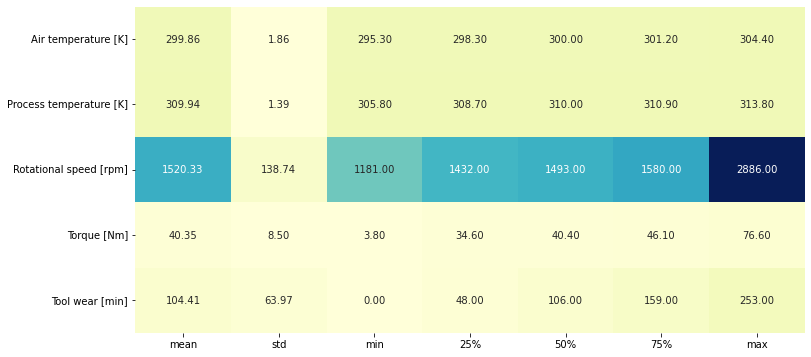

In [13]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
plt.figure(figsize =(12,6))
sns.heatmap(stats, annot = True, cmap='YlGnBu', fmt=".2f", cbar=False)

### Univariate analysis

In [14]:
numerical_col

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

To understand the data distribution and relationships between variables, we visualize the data using plots.

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amita\anaconda3\lib\si

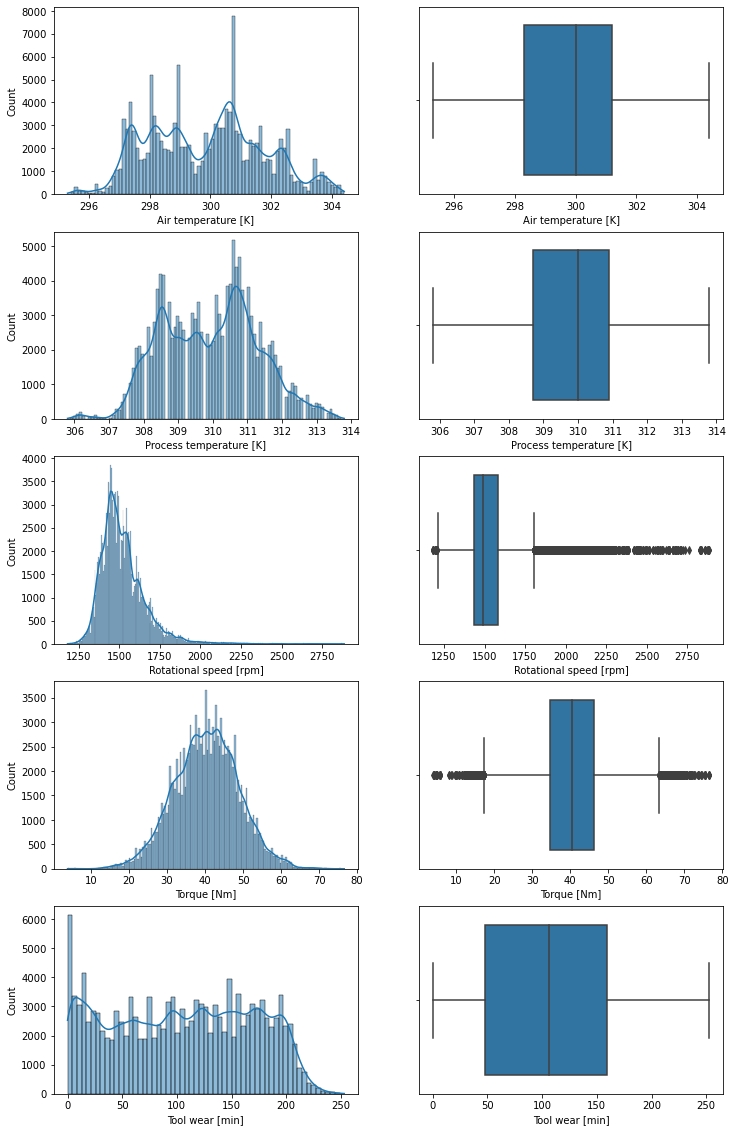

In [15]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
fig, axes = plt.subplots(len(numerical_col), 2, figsize=(12, 20))

for i, col in enumerate(numerical_col):
    sns.histplot(df[col], ax= axes[i,0], kde=True)
    
    sns.boxplot(df[col], ax= axes[i,1])

To understand the data distribution and relationships between variables, we visualize the data using plots.

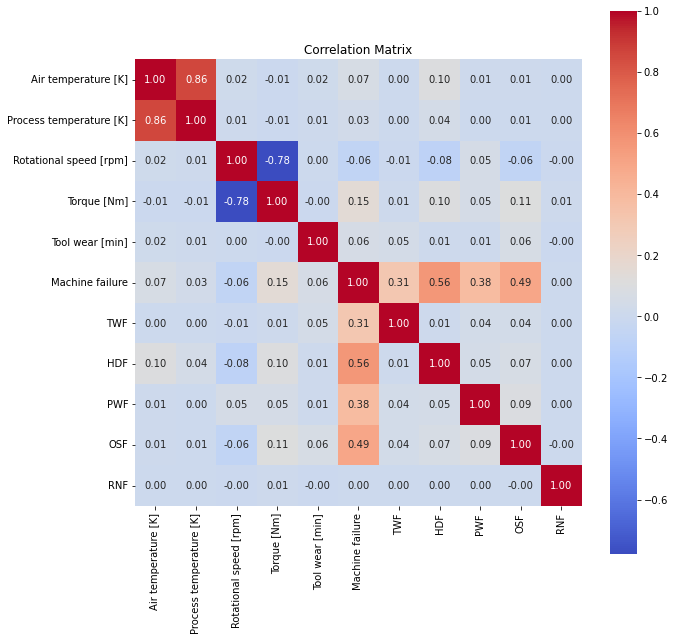

In [16]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
corr_matrix = df.corr()

# create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

To understand the data distribution and relationships between variables, we visualize the data using plots.

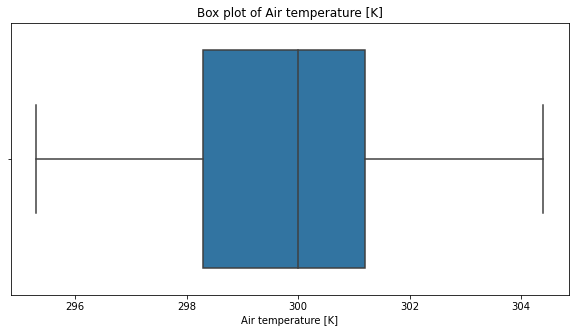

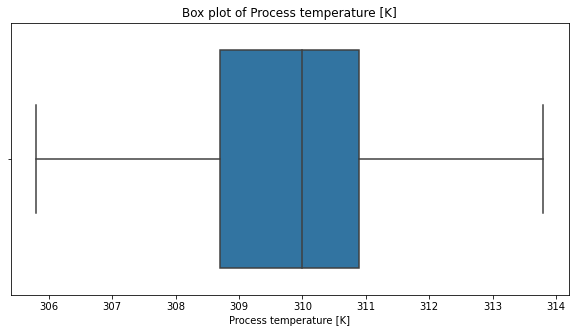

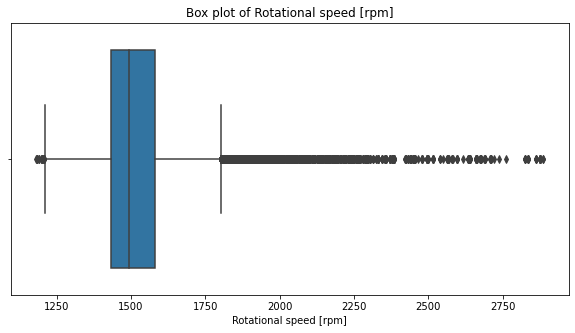

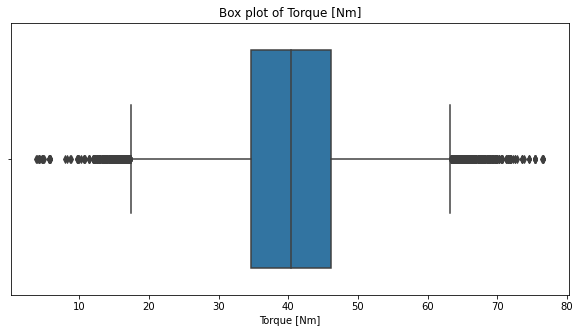

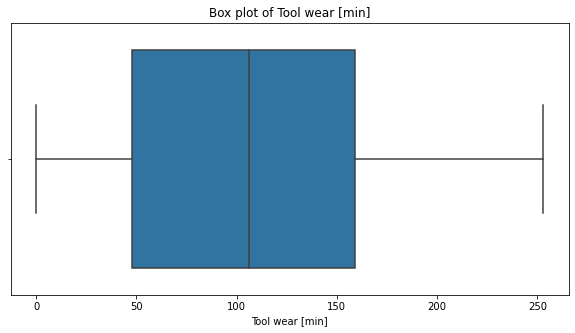

In [17]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
# List of numerical variables
num_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Creating box plots for each variable
for var in num_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = df[var])
    plt.title('Box plot of ' + var)
    plt.show()

To understand the data distribution and relationships between variables, we visualize the data using plots.

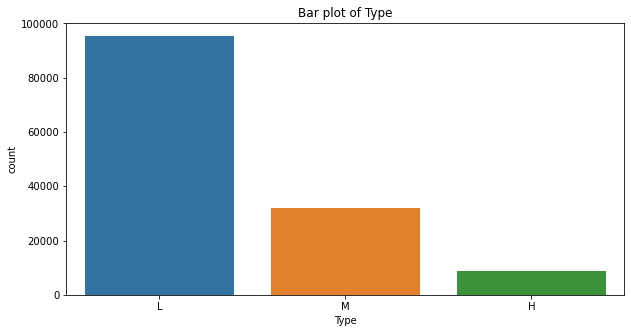

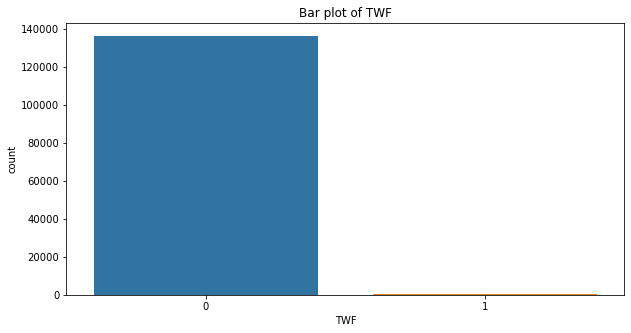

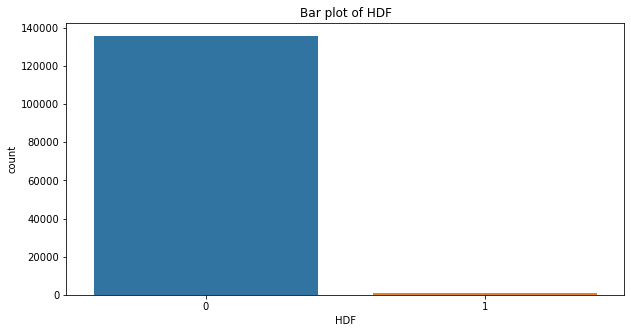

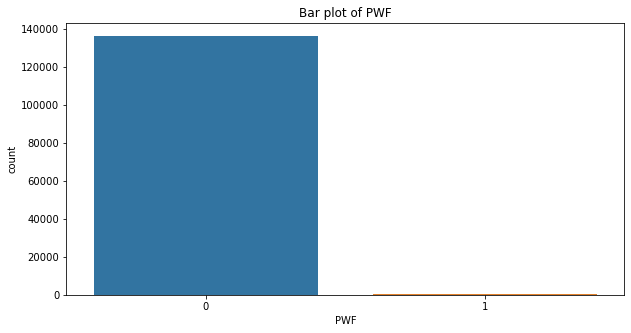

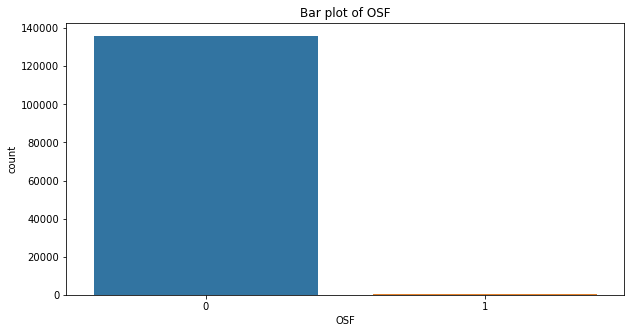

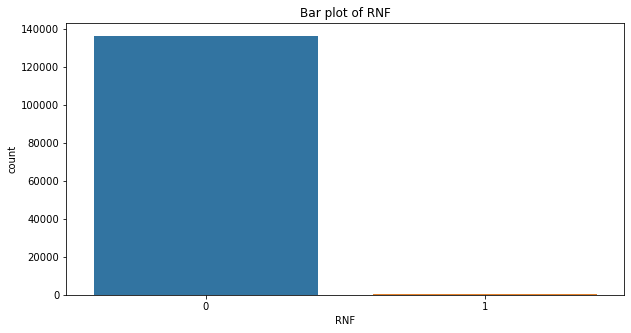

In [18]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
cat_vars = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Creating bar plots for each variable
for var in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = df[var])
    plt.title('Bar plot of ' + var)
    plt.show()

To understand the data distribution and relationships between variables, we visualize the data using plots.

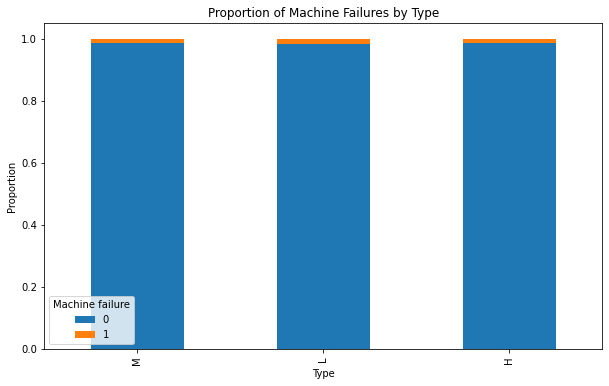

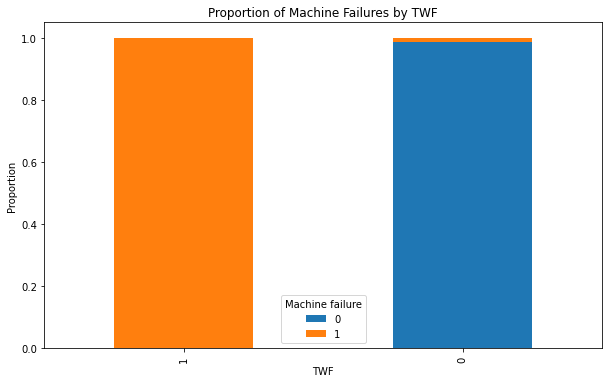

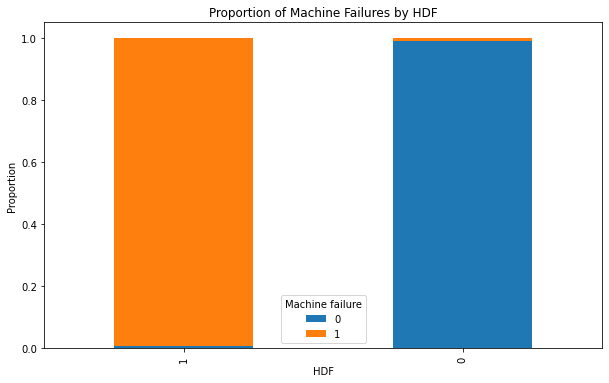

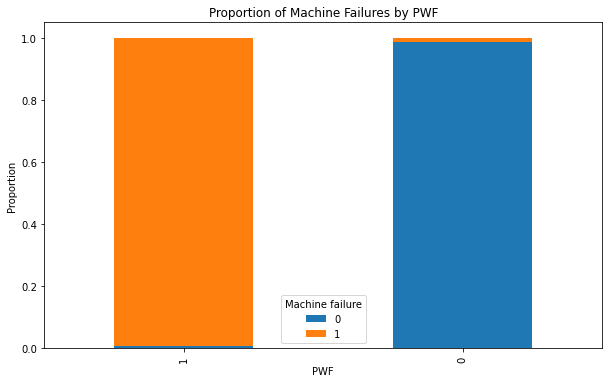

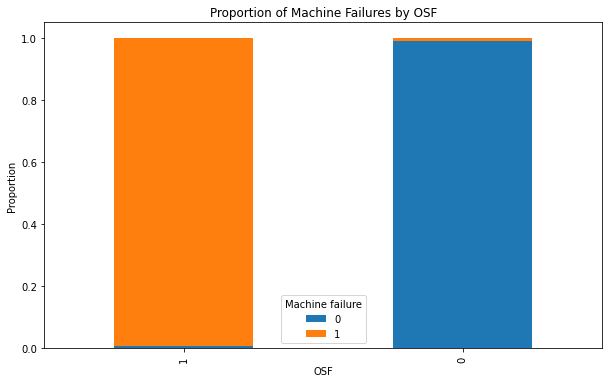

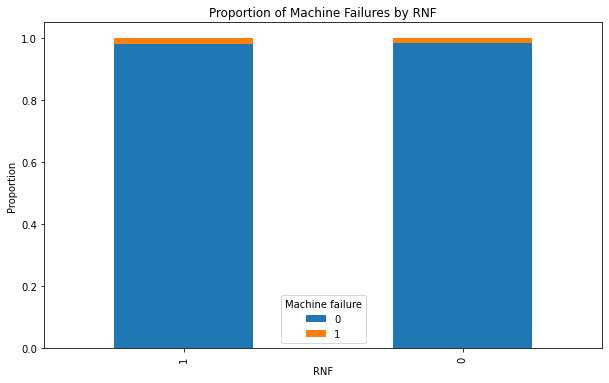

In [19]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
cat_vars = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

for var in cat_vars:
    # Calculate the proportions
    prop_df = (df.groupby([var])['Machine failure']
               .value_counts(normalize=True)
               .unstack()
               .sort_index(ascending=False)
               .reset_index())

    # Create stacked bar plot
    prop_df.plot(x=var, kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Proportion of Machine Failures by ' + var)
    plt.ylabel('Proportion')
    plt.show()

To understand the data distribution and relationships between variables, we visualize the data using plots.

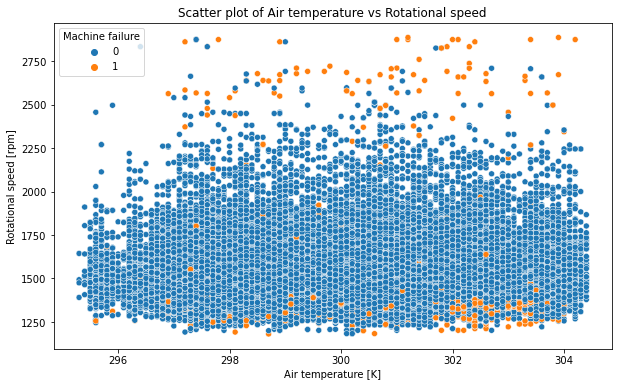

In [20]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
# Scatter plot of Air temperature [K] and Rotational speed [rpm], color-coded by Machine failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Air temperature [K]', y='Rotational speed [rpm]', hue='Machine failure', data=df)
plt.title('Scatter plot of Air temperature vs Rotational speed')
plt.show()


To understand the data distribution and relationships between variables, we visualize the data using plots.

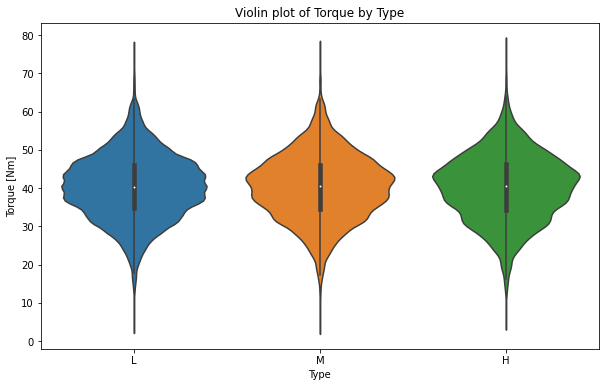

In [21]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
# Violin plot of Torque [Nm] for different Types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Torque [Nm]', data=df)
plt.title('Violin plot of Torque by Type')
plt.show()


To understand the data distribution and relationships between variables, we visualize the data using plots.

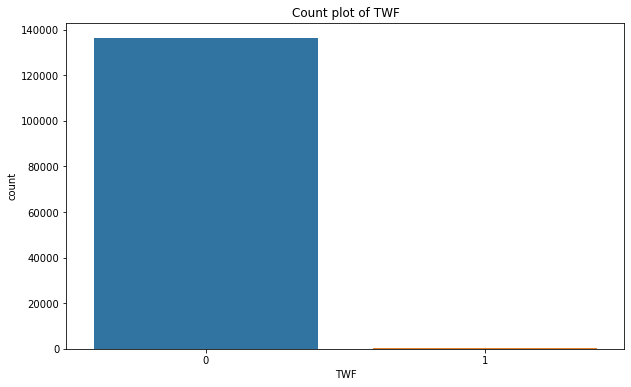

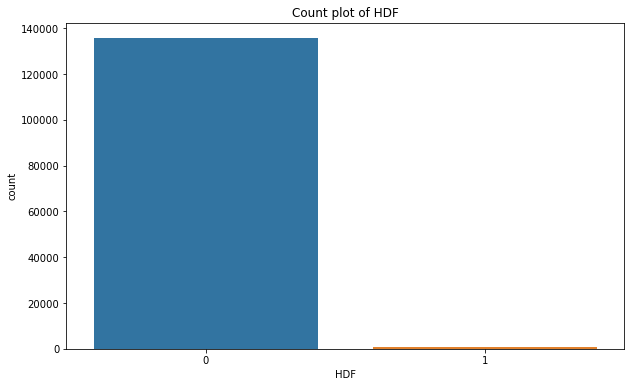

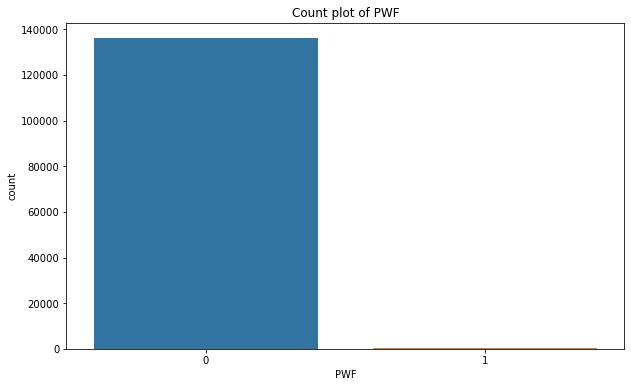

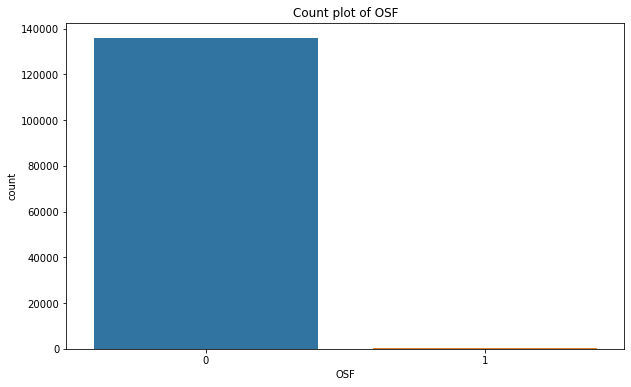

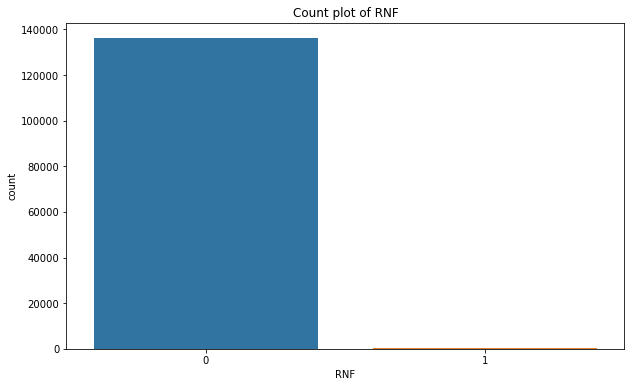

In [22]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
# List of failure types
fail_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Creating count plots for each failure type
for var in fail_types:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[var])
    plt.title('Count plot of ' + var)
    plt.show()


In [23]:
# Cross-tabulation of Type and Machine failure
cross_tab = pd.crosstab(df['Type'], df['Machine failure'])
print(cross_tab)


Machine failure      0     1
Type                        
H                 8807   116
L                93759  1595
M                31715   437


In [24]:
# Cross-tabulation of Type and Machine failure
cross_tab = pd.crosstab(df['Type'], df['Machine failure'], normalize='index')

# Convert to percentages
cross_tab_percentage = cross_tab.mul(100).round(2)

print(cross_tab_percentage)


Machine failure      0     1
Type                        
H                98.70  1.30
L                98.33  1.67
M                98.64  1.36


To understand the data distribution and relationships between variables, we visualize the data using plots.

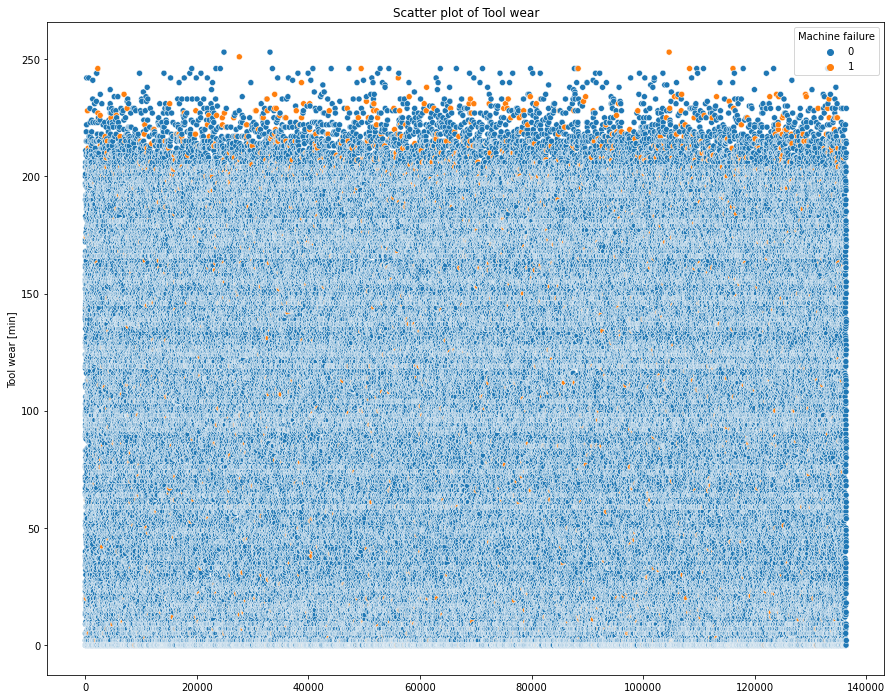

In [25]:
# Visualize the data to understand its distribution and relationships
# Visualize the data
# Scatter plot of Tool wear, color-coded by Machine failure
plt.figure(figsize=(15, 12))
sns.scatterplot(x=df.index, y='Tool wear [min]', hue='Machine failure', data=df)
plt.title('Scatter plot of Tool wear')
plt.show()


In [26]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [27]:
# COverting df.type to dummy variables

Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [28]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
pd.get_dummies(df['Type'], drop_first=True)

,L,M
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
136424,0,1
136425,0,0
136426,1,0
136427,1,0


Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [29]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
# Merging the dummy variables to the data frame
df_dum= pd.concat([df,pd.get_dummies(df['Type'], drop_first=True)], axis=1)

Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [30]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
df_dum = df_dum.drop('Type', 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\1852005163.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dum = df_dum.drop('Type', 1)


# Splitting to X and y

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [31]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.model_selection: Description
from sklearn.model_selection import train_test_split

Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [32]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
X = df_dum.drop('Machine failure', 1)
y = df_dum['Machine failure']

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\1512731610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_dum.drop('Machine failure', 1)


In [33]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1


In [34]:
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

### Train test split

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [35]:
# Train and evaluate the machine learning model
# Model training/evaluation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11, stratify=y)

In [36]:
print(X_train.shape)
print(X_test.shape)

(102321, 12)
(34108, 12)


# SCaling data

In [37]:
to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [38]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.preprocessing: Description
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [39]:
# Train and evaluate the machine learning model
# Model training/evaluation
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [40]:
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
77397,-0.194368,0.044827,1.555509,-1.687313,1.040625,0,0,0,0,0,1,0
45525,1.363694,0.117161,-1.377193,1.913374,0.196592,0,0,0,0,0,1,0
70868,0.665253,0.840501,-0.644018,0.266000,-0.991306,0,0,0,0,0,0,1
42750,-0.033189,-0.389177,0.333550,-0.569453,1.040625,0,0,0,0,0,1,0
20080,-0.892810,-1.184850,0.196978,-0.769491,0.509197,0,0,0,0,0,1,0


# Model building

### Logistic regression

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [41]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.linear_model: Description
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [43]:
# Train and evaluate the machine learning model
# Model training/evaluation
model = log.fit(X_train, y_train)

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [44]:
# Train and evaluate the machine learning model
# Model training/evaluation
pred_prob = model.predict_proba(X_test)

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [45]:
# Train and evaluate the machine learning model
# Model training/evaluation
pred = model.predict(X_test)

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [46]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.metrics: Description
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
accuracy_score(y_test, pred)

0.9958953911105899

In [48]:
confusion_matrix(y_test, pred)

array([[33568,     3],
       [  137,   400]], dtype=int64)

In [49]:
pred_prob[0]

array([0.99657522, 0.00342478])

In [50]:
pred[0]

0

In [51]:
cut_off= list(range(20,81,5))

In [52]:
tab =  pd.DataFrame()

In [53]:
tab['prob'] = pred_prob[:,1]

In [54]:
pred_prob.shape

(34108, 2)

In [55]:
# Assuming that y_test is your actual test set target values
# creating thresholds from 0.2 to 0.81 with a step of 0.5

thresholds = np.arange(0.2, 0.81, 0.05)
print(thresholds)

for l in thresholds:
    val=[]
    for k in tab['prob']:
        if k >= l:
            val.append(1)
        else:
            val.append(0)
    
    tab[l]=val




[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]


In [56]:
tab

,prob,0.2,0.25,0.3,0.35,0.39999999999999997,0.44999999999999996,0.49999999999999994,0.5499999999999999,0.5999999999999999,0.6499999999999999,0.7,0.7499999999999998,0.7999999999999998
0,0.003425,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.001343,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000997,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.001672,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.002210,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34103,0.005738,0,0,0,0,0,0,0,0,0,0,0,0,0
34104,0.001001,0,0,0,0,0,0,0,0,0,0,0,0,0
34105,0.001151,0,0,0,0,0,0,0,0,0,0,0,0,0
34106,0.000672,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
for l in list(tab.columns)[1:]:
    print("threshold = ",l)
    print(confusion_matrix(y_test,tab[l]))
    print("  ")

threshold =  0.2
[[33568     3]
 [  135   402]]
  
threshold =  0.25
[[33568     3]
 [  135   402]]
  
threshold =  0.3
[[33568     3]
 [  136   401]]
  
threshold =  0.35
[[33568     3]
 [  136   401]]
  
threshold =  0.39999999999999997
[[33568     3]
 [  136   401]]
  
threshold =  0.44999999999999996
[[33568     3]
 [  136   401]]
  
threshold =  0.49999999999999994
[[33568     3]
 [  137   400]]
  
threshold =  0.5499999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.5999999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.6499999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.7
[[33568     3]
 [  137   400]]
  
threshold =  0.7499999999999998
[[33568     3]
 [  137   400]]
  
threshold =  0.7999999999999998
[[33568     3]
 [  138   399]]
  


### So for logistic regression, the cutoff would be 0.40

# Random forest

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [58]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.ensemble: Description
from sklearn.ensemble import RandomForestClassifier

In [59]:
forest = RandomForestClassifier()

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [60]:
# Train and evaluate the machine learning model
# Model training/evaluation
forest.fit(X_train, y_train)

RandomForestClassifier()

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [61]:
# Train and evaluate the machine learning model
# Model training/evaluation
pred_forest = forest.predict(X_test)

In [62]:
confusion_matrix(y_test, pred_forest)

array([[33561,    10],
       [  131,   406]], dtype=int64)

In [63]:
accuracy_score(y_test, pred_forest)

0.9958660724756655

# Adaboost

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [64]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.ensemble: Description
from sklearn.ensemble import AdaBoostClassifier

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [65]:
# Train and evaluate the machine learning model
# Model training/evaluation
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
pred_ada = forest.predict(X_test)

In [66]:
confusion_matrix(y_test, pred_ada)

array([[33561,    10],
       [  131,   406]], dtype=int64)

In [67]:
accuracy_score(y_test, pred_ada)

0.9958660724756655

# neural networks

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [69]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# tensorflow.keras.models: Description
# tensorflow.keras.layers: Description
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# define the keras model
model = Sequential()

# Input layer
model.add(Dense(50, input_dim=12, activation='relu'))

# Hidden layer 1
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5)) # Dropout layer after first hidden layer

# Hidden layer 2
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization()) # Batch normalization layer after second hidden layer

# # Hidden layer 3
# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.2)) # Dropout layer after third hidden layer

# Output layer
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                        

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [73]:
# Train and evaluate the machine learning model
# Model training/evaluation
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0588 - accuracy: 0.9850
Epoch 2/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0245 - accuracy: 0.9958
Epoch 3/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0236 - accuracy: 0.9961
Epoch 4/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0231 - accuracy: 0.9961
Epoch 5/40
3198/3198 [==============================] - 6s 2ms/step - loss: 0.0223 - accuracy: 0.9961
Epoch 6/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0225 - accuracy: 0.9961
Epoch 7/40
3198/3198 [==============================] - 6s 2ms/step - loss: 0.0220 - accuracy: 0.9961
Epoch 8/40
3198/3198 [==============================] - 6s 2ms/step - loss: 0.0220 - accuracy: 0.9962
Epoch 9/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.0220 - accuracy: 0.9961
Epoch 10/40
3198/3198 [==============================] - 7s 2ms/step - loss: 0.022

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [74]:
# Train and evaluate the machine learning model
# Model training/evaluation
pred_neural = model.predict(X_test)

In [78]:
tab_neural = pd.DataFrame()

In [83]:
pred_neural[0:]

array([[0.00317678],
       [0.00252476],
       [0.00073063],
       ...,
       [0.00076741],
       [0.00036734],
       [0.00075769]], dtype=float32)

In [85]:
tab_neural['prob'] = pred_neural.ravel()

In [86]:
thresholds = np.arange(0.2, 0.81, 0.05)
print(thresholds)

for l in thresholds:
    val=[]
    for k in tab_neural['prob']:
        if k >= l:
            val.append(1)
        else:
            val.append(0)
    
    tab_neural[l]=val

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]


In [87]:
tab_neural

,prob,0.2,0.25,0.3,0.35,0.39999999999999997,0.44999999999999996,0.49999999999999994,0.5499999999999999,0.5999999999999999,0.6499999999999999,0.7,0.7499999999999998,0.7999999999999998
0,0.003177,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.002525,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000731,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.001572,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.004178,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34103,0.004687,0,0,0,0,0,0,0,0,0,0,0,0,0
34104,0.000848,0,0,0,0,0,0,0,0,0,0,0,0,0
34105,0.000767,0,0,0,0,0,0,0,0,0,0,0,0,0
34106,0.000367,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
for l in list(tab.columns)[1:]:
    print("threshold = ",l)
    print(accuracy_score(y_test,tab[l]))
    print("  ")

threshold =  0.2
0.9959540283804386
  
threshold =  0.25
0.9959540283804386
  
threshold =  0.3
0.9959247097455143
  
threshold =  0.35
0.9959247097455143
  
threshold =  0.39999999999999997
0.9959247097455143
  
threshold =  0.44999999999999996
0.9959247097455143
  
threshold =  0.49999999999999994
0.9958953911105899
  
threshold =  0.5499999999999999
0.9958953911105899
  
threshold =  0.5999999999999999
0.9958953911105899
  
threshold =  0.6499999999999999
0.9958953911105899
  
threshold =  0.7
0.9958953911105899
  
threshold =  0.7499999999999998
0.9958953911105899
  
threshold =  0.7999999999999998
0.9958660724756655
  


In [89]:
for l in list(tab.columns)[1:]:
    print("threshold = ",l)
    print(confusion_matrix(y_test,tab[l]))
    print("  ")

threshold =  0.2
[[33568     3]
 [  135   402]]
  
threshold =  0.25
[[33568     3]
 [  135   402]]
  
threshold =  0.3
[[33568     3]
 [  136   401]]
  
threshold =  0.35
[[33568     3]
 [  136   401]]
  
threshold =  0.39999999999999997
[[33568     3]
 [  136   401]]
  
threshold =  0.44999999999999996
[[33568     3]
 [  136   401]]
  
threshold =  0.49999999999999994
[[33568     3]
 [  137   400]]
  
threshold =  0.5499999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.5999999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.6499999999999999
[[33568     3]
 [  137   400]]
  
threshold =  0.7
[[33568     3]
 [  137   400]]
  
threshold =  0.7499999999999998
[[33568     3]
 [  137   400]]
  
threshold =  0.7999999999999998
[[33568     3]
 [  138   399]]
  


# using logistic regression  since that gave the best results

### Retraning the model with the whole dataset

In [105]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,1,0


In [91]:
y.shape

(136429,)

In [106]:
to_scale

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In this notebook, we begin by importing the essential libraries that provide functionalities for data manipulation, numerical computations, and visualization.

In [111]:
# Import essential libraries:
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib and seaborn for data visualization
# Import necessary libraries
# sklearn.preprocessing: Description
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [112]:
# Train and evaluate the machine learning model
# Model training/evaluation
X[to_scale] = scaler.fit_transform(X[to_scale])

In [114]:
pd.DataFrame(X)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,1,0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,1
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,1,0
3,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,1,0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,0,0,0,0,0,0,1
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,0,0,0,0,0,0,0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,0,0,0,0,0,1,0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,0,0,0,0,0,1,0


Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [127]:
# Train and evaluate the machine learning model
# Model training/evaluation
logfin = LogisticRegression()

model = logfin.fit(X, y)

In [128]:
# Now model has been trained

In [129]:
# WIll make required transforations on the test set

Next, we load the machine dataset which contains information about various machine parameters and whether a failure occurred.

In [130]:
# Load the machine dataset
# Load the dataset
test = pd.read_csv("C:\\Users\\amita\\OneDrive\\Desktop\\Kaggle\\Binary Classification of machine Failurs\\playground-series-s3e17\\test.csv")

In [131]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [132]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
test = test.drop(["id", "Product ID"], 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\2397355319.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop(["id", "Product ID"], 1)


Data preprocessing is an essential step before modeling. Here, we handle missing values, remove unnecessary columns, and prepare the data for modeling.

In [133]:
# Preprocess the data: handle missing values, outliers, or other irregularities
# Data preprocessing/manipulation
# Merging the dummy variables to the data frame
test_dum= pd.concat([test,pd.get_dummies(test['Type'], drop_first=True)], axis=1)

test_dum = test_dum.drop('Type', 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_7244\3045310746.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_dum = test_dum.drop('Type', 1)


In [134]:
test_dum

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,1,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,1,0
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,1,0
3,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,1
4,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,302.3,311.4,1484,40.4,15,0,0,0,0,0,1,0
90950,297.9,309.8,1542,33.8,31,0,0,0,0,0,1,0
90951,295.6,306.2,1501,41.4,187,0,0,0,0,0,1,0
90952,298.1,307.8,1534,40.3,69,0,0,0,0,0,1,0


In [135]:
test_dum[to_scale] = scaler.transform(test_dum[to_scale])

In [137]:
pd.DataFrame(test_dum)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,0,0,0,0,0,1,0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,0,0,0,0,0,1,0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,0,0,0,0,0,1,0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,0,0,0,0,0,0,1
4,1.899446,1.702992,-0.038426,0.111895,0.149943,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,0,0,0,0,0,1,0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,0,0,0,0,0,1,0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,0,0,0,0,0,1,0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,0,0,0,0,0,1,0


Once the data is prepared, we move to the modeling phase. This involves splitting the data, training a model, and evaluating its performance.

In [139]:
# Train and evaluate the machine learning model
# Model training/evaluation
test_pred= logfin.predict_proba(test_dum)

In [144]:
submission = pd.DataFrame()


Next, we load the machine dataset which contains information about various machine parameters and whether a failure occurred.

In [145]:
# Load the machine dataset
# Load the dataset
test_new = pd.read_csv("C:\\Users\\amita\\OneDrive\\Desktop\\Kaggle\\Binary Classification of machine Failurs\\playground-series-s3e17\\test.csv")

In [146]:
submission['id'] = test_new['id']

In [154]:
submission['Machine failure'] = np.where(test_pred[:,1] >= 0.4, 1, 0)

In [155]:
submission

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [158]:
submission.to_csv('submission.csv', index=False)